# Example 1

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#%% Eksempel 1

# data generering - norm.fordelt
X = np.random.randn(1000, 2) # Gauss N(0,1)

X = X @ np.array([[1, 0],[0, 10]])  # OBS: std afv = 1 og 10

theta = np.radians(55)
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),  np.cos(theta)]])  # Rotation af data
X = X @ R

# Tilføj offset / middelværdi
X = X + np.tile(np.array([20, 40]), (1000, 1))

plt.scatter(X[:,0], X[:,1], s=2)
plt.axis('equal')

(-14.6224202256091, 47.84843557289477, 15.238292904362854, 59.879158651397816)

In [6]:
#%% Fit PCA

pca = PCA(n_components=1)
pca.fit(X)

# principale akser
v1 = pca.components_

# varianser og standard afvigelser (længde af akser)
varians1 = pca.explained_variance_
s1 = np.sqrt(varians1)

# Udtrukket middelværdi
m1 = pca.mean_


# Example 2

In [3]:
#%% Eksempel 2

# data generering - Gauss
X2 = np.random.randn(10000, 50)
Dmat = np.diag(np.linspace(5, 100, 50)) # 50 værdier fra 5 til 100
X2 = X2 @ Dmat


Text(0.5, 0, 'Dimension nummer')

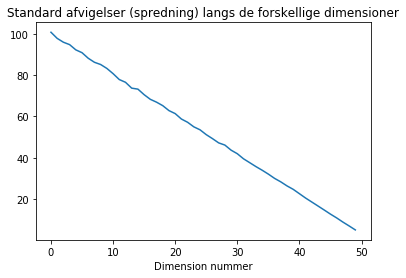

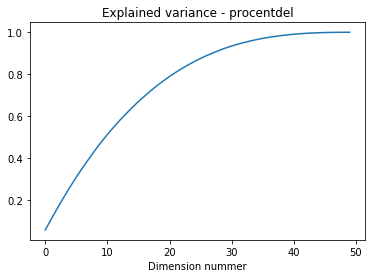

In [4]:
#%% Fit PCA

pca2 = PCA(n_components=50)  # medtager alle komponenter
pca2.fit(X2)

v1 = pca2.components_

s1 = np.sqrt(pca2.explained_variance_) # OBS: Relater til Dmat..
plt.plot(s1)
plt.title('Standard afvigelser (spredning) langs de forskellige dimensioner')
plt.xlabel('Dimension nummer')

plt.figure()
plt.plot(np.cumsum(pca2.explained_variance_)/np.sum(pca2.explained_variance_))
plt.title('Explained variance - procentdel')
plt.xlabel('Dimension nummer')



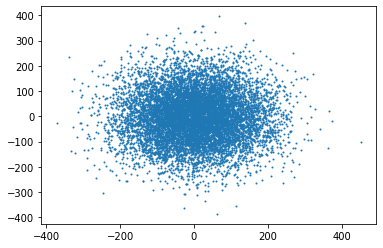

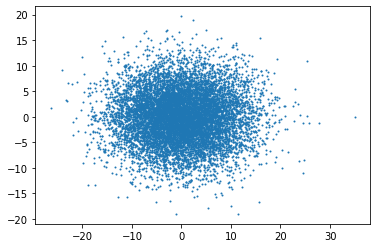

In [5]:
#%% Projektion på 2D til visualisering

# Alternativ : Brug fit_transform eller transform direkte..
v2d = v1[:2,:] # to første comp
X2proj = X2 @ v2d.T
plt.scatter(X2proj[:,0], X2proj[:,1], s=1) # Læg mærke til standard afvigelserne..


v2d2 = v1[48:,:] # to sidste comp
X2proj2 = X2 @ v2d2.T
plt.figure()
plt.scatter(X2proj2[:,0], X2proj2[:,1], s=1)